# Extraction of phonation features from audio files

Compute phonation features from sustained vowels and continuous speech.

For continuous speech, the features are computed over voiced segments

Seven descriptors are computed:
1. First derivative of the fundamental Frequency
2. Second derivative of the fundamental Frequency
3. Jitter
4. Shimmer
5. Amplitude perturbation quotient
6. Pitch perturbation quotient
7. Logaritmic Energy

Static or dynamic matrices can be computed:

Static matrix is formed with 29 features formed with (seven descriptors) x (4 functionals: mean, std, skewness, kurtosis) + degree of Unvoiced

Dynamic matrix is formed with the seven descriptors computed for frames of 40 ms.

Notes:

1. In dynamic features the first 11 frames of each recording are not considered to be able to stack the APQ and PPQ descriptors with the remaining ones.
2. The fundamental frequency is computed the RAPT algorithm. To use the PRAAT method,  change the "self.pitch method" variable in the class constructor.


In [1]:
import sys
sys.path.append("../")
from phonation.phonation import Phonation

In [2]:
phonationf=Phonation()
file_audio="../audios/001_a1_PCGITA.wav"

## Extract features and return them as a numpy array

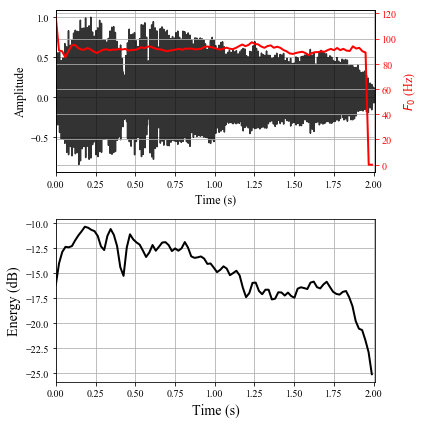

(28,)


In [4]:
features1=phonationf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")
print(features1.shape)

## Extract static features and return them as a dataframe 

In [5]:
features1=phonationf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

   avg DDF0   avg DF0  avg Jitter  avg Shimmer   avg apq   avg logE   avg ppq  \
0  0.260563 -0.285194    1.109532     3.355305  4.710208 -14.769208  0.760321   

   kurtosis DDF0  kurtosis DF0  kurtosis Jitter    ...     skewness apq  \
0      36.588627     57.078802        74.302736    ...         1.499278   

   skewness logE  skewness ppq  std DDF0   std DF0  std Jitter  std Shimmer  \
0      -0.795943      3.090648  3.244207  2.975543    2.289024     4.614546   

    std apq  std logE   std ppq  
0  3.786233  2.844835  0.828831  

[1 rows x 28 columns]


## Extract dynamic features and return them as a dataframe

In [6]:
features1=phonationf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1.head())

       DDF0       DF0    Jitter    Shimmer       apq       logE       ppq
0 -0.514961 -1.673622  0.976936   0.000000  2.492831 -10.827903  1.333111
1  0.531448 -1.142174  1.206685   3.746383  8.872992 -11.311134  0.663489
2  2.552956  1.410782  1.059427  18.765860  5.753265 -12.346167  1.417151
3 -0.172165  1.238617  0.237312  13.914695  7.487062 -12.714211  0.789910
4 -0.961166  0.277451  0.609431   0.808527  7.592277 -11.299057  0.787418


## Extract dynamic features and return them as a torch tensor

In [8]:
features1=phonationf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

torch.float64
torch.Size([87, 7])


## Extract static features from a path return them as a numpy array

In [9]:
path_audio="../audios/"
features1=phonationf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 098_u1_PCGITA.wav: 100%|██████████| 3/3 [00:00<00:00, 17.39it/s]  

(3, 28)
